In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
training_data = pd.read_csv('training.csv', low_memory=False)
test_data = pd.read_csv('public_test_features.csv', low_memory=False)
metadata_df = pd.read_excel('metadata-dataset.xlsx')

In [3]:
print(training_data.dtypes)

ID                                      int64
label                                   int64
key_Region Id                           int64
key_MarketPlace Id                      int64
key_ASIN                               object
                                        ...  
cand_dw_last_updated                   object
cand_is_deleted                        object
cand_last_updated                      object
cand_version                            int64
cand_external_testing_certification    object
Length: 228, dtype: object


In [4]:
import pandas as pd

# Load the training dataset
training_data = pd.read_csv('training.csv', low_memory= False)

# Check for columns where every row is filled (no null values)
all_filled_columns = []
for col in training_data.columns:
    if training_data[col].notnull().all():  # Check if all rows are not null
        all_filled_columns.append(col)

# Display columns where every row is filled
print("Columns with every row filled:")
print(all_filled_columns)

Columns with every row filled:
['ID', 'label', 'key_Region Id', 'key_MarketPlace Id', 'key_ASIN', 'key_classification_code', 'key_classification_description', 'key_creation_date', 'key_currency_code', 'key_Product Group Code', 'key_Product Group Description', 'key_has_ean', 'key_has_online_play', 'key_has_platform', 'key_has_recommended_browse_nodes', 'key_has_upc', 'key_is_advantage', 'key_is_conveyable', 'key_is_discontinued', 'key_is_manufacture_on_demand', 'key_Is Sortable', 'key_item_classification_id', 'key_item_name', 'key_language_code', 'key_product_type', 'key_product_type_id', 'key_dw_creation_date', 'key_dw_last_updated', 'key_is_deleted', 'key_last_updated', 'key_version', 'cand_Region Id', 'cand_MarketPlace Id', 'cand_ASIN', 'cand_creation_date', 'cand_currency_code', 'cand_Product Group Code', 'cand_Product Group Description', 'cand_has_ean', 'cand_has_online_play', 'cand_has_platform', 'cand_has_recommended_browse_nodes', 'cand_has_upc', 'cand_is_advantage', 'cand_is_co

In [5]:

num_all_filled_columns = len(all_filled_columns)
# Display the number of columns
print("Number of columns with every row filled:", num_all_filled_columns)

Number of columns with every row filled: 56


In [6]:
# Define a dictionary to map 'Y' to 1 and 'N' to 0
binary_mapping = {'Y': 1, 'N': 0}

# Iterate over columns and replace 'Y' and 'N' with 1 and 0, respectively
for col in training_data.columns:
    if training_data[col].dtype == 'object':  # Check if column dtype is 'object' (string)
        training_data[col] = training_data[col].replace(binary_mapping)

# Display the preprocessed DataFrame
print(training_data)


          ID  label  key_Region Id  key_MarketPlace Id    key_ASIN  \
0      34016      0              1                   1  B00YCZ6IKA   
1       3581      0              1                   1  B00U25WT7A   
2      36025      1              1                   1  B011BZ3GXU   
3      42061      1              1                   1  B0089XDG3I   
4      14628      1              1                   1  B014UTSBZW   
...      ...    ...            ...                 ...         ...   
36798   9631      0              1                   1  B0002ABA8E   
36799  16965      1              1                   1  B000H46XQE   
36800  50014      1              1                   1  B01HFRC7UQ   
36801  42674      1              1                   1  B001T0HHDS   
36802  13930      1              1                   1  B006NKT9EO   

           key_Binding Code key_binding_description key_brand_code  \
0                   kitchen                 Kitchen          NICLW   
1            office

In [7]:
# Get numerical features using select_dtypes
numerical_features = training_data.select_dtypes(include=['int64', 'float64'])

# Display the numerical features
print("Numerical Features:" )
print(len(numerical_features))
print(numerical_features.columns.tolist())
# Get categorical features using select_dtypes
categorical_features = training_data.select_dtypes(include=['object'])

# Display the categorical features
print("Categorical Features:")
print(len(categorical_features))
print(categorical_features.columns.tolist())

Numerical Features:
36803
['ID', 'label', 'key_Region Id', 'key_MarketPlace Id', 'key_case_pack_quantity', 'key_country_of_origin', 'key_discontinued_date', 'key_ean', 'key_excluded_direct_browse_node_id', 'key_fedas_id', 'key_fma_qualified_price_max', 'key_Product Group Code', 'key_has_ean', 'key_has_online_play', 'key_has_platform', 'key_has_recommended_browse_nodes', 'key_has_upc', 'key_is_adult_product', 'key_is_advantage', 'key_is_certified_organic', 'key_is_conveyable', 'key_is_discontinued', 'key_is_manufacture_on_demand', 'key_is_phone_upgradeable', 'key_Is Sortable', 'key_is_super_saver_shipping_excl', 'key_isbn', 'key_item_classification_id', 'key_item_display_diameter', 'key_item_display_height', 'key_item_display_length', 'key_item_display_volume', 'key_item_display_weight', 'key_item_display_width', 'key_item_height', 'key_item_length', 'key_item_package_quantity', 'key_item_weight', 'key_item_width', 'key_manufacturer_sku', 'key_max_weight_recommendation', 'key_min_weight

In [8]:

# Check for missing values in the training dataset
missing_values = training_data.isnull().sum()

# Display the columns with missing values and their respective counts
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
key_Binding Code                        4595
key_binding_description                 4595
key_brand_code                         20645
key_case_pack_quantity                 20295
key_color_map                          24948
                                       ...  
cand_pkg_weight                         7668
cand_pkg_weight_uom                     7668
cand_pkg_width                          7398
cand_release_date_embargo_level        36694
cand_external_testing_certification    36226
Length: 172, dtype: int64


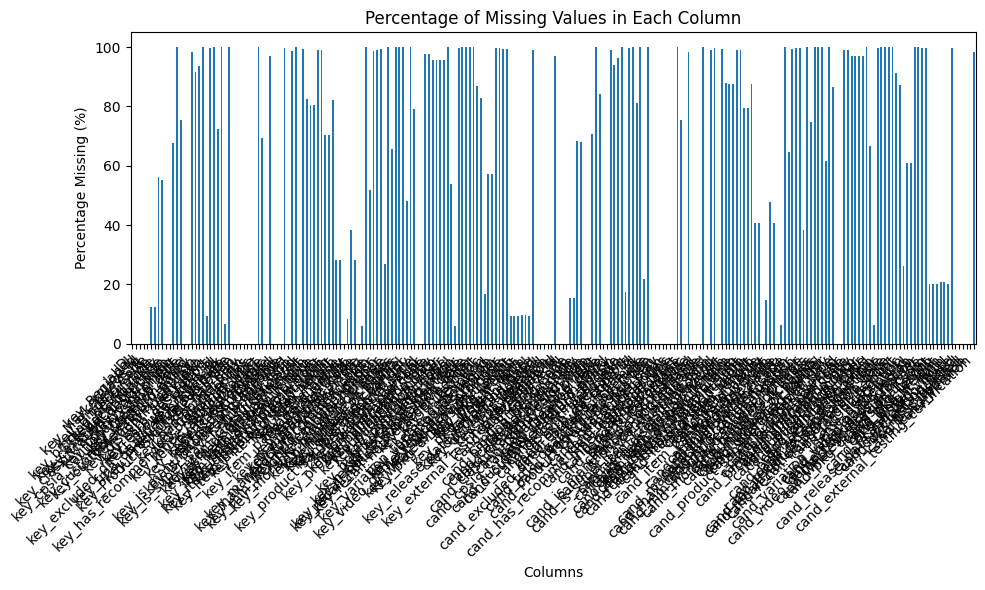

Columns with missing values < 20%:
['ID', 'label', 'key_Region Id', 'key_MarketPlace Id', 'key_ASIN', 'key_Binding Code', 'key_binding_description', 'key_classification_code', 'key_classification_description', 'key_creation_date', 'key_currency_code', 'key_ean', 'key_fma_qualified_price_max', 'key_Product Group Code', 'key_Product Group Description', 'key_has_ean', 'key_has_online_play', 'key_has_platform', 'key_has_recommended_browse_nodes', 'key_has_upc', 'key_is_advantage', 'key_is_conveyable', 'key_is_discontinued', 'key_is_manufacture_on_demand', 'key_Is Sortable', 'key_item_classification_id', 'key_item_name', 'key_item_package_quantity', 'key_language_code', 'key_manufacturer_name', 'key_product_type', 'key_product_type_id', 'key_publisher_studio_label', 'key_upc', 'key_pkg_dimensional_uom', 'key_pkg_height', 'key_pkg_length', 'key_pkg_weight', 'key_pkg_weight_uom', 'key_pkg_width', 'key_dw_creation_date', 'key_dw_last_updated', 'key_is_deleted', 'key_last_updated', 'key_version

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the percentage of missing values in each column
missing_percent = (training_data.isnull().mean() * 100).round(2)

# Create a bar chart to visualize missing values
plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Get the names of columns with missing values where the percentage is greater than 50%
missing_cols_lt_20 = missing_percent[missing_percent < 20].index.tolist()
print("Columns with missing values < 20%:")
print(missing_cols_lt_20)
print(len(missing_cols_lt_20))

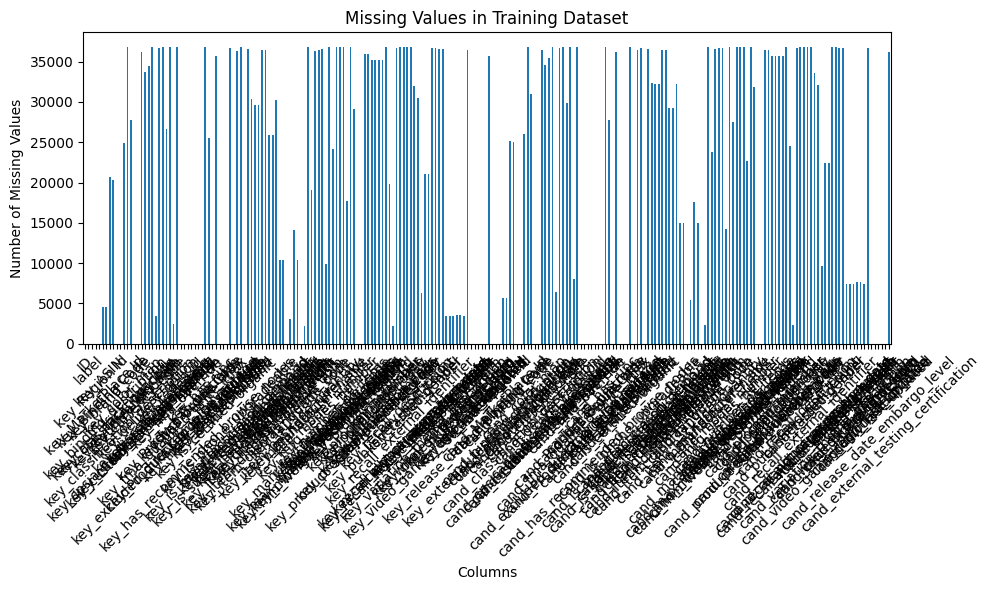

Numerical Columns with Missing Values (Percentage < 20%):
['key_Binding Code', 'key_binding_description', 'key_ean', 'key_fma_qualified_price_max', 'key_item_package_quantity', 'key_manufacturer_name', 'key_publisher_studio_label', 'key_upc', 'key_pkg_dimensional_uom', 'key_pkg_height', 'key_pkg_length', 'key_pkg_weight', 'key_pkg_weight_uom', 'key_pkg_width', 'cand_Binding Code', 'cand_binding_description', 'cand_classification_code', 'cand_classification_description', 'cand_ean', 'cand_item_classification_id', 'cand_item_name', 'cand_item_package_quantity', 'cand_manufacturer_name', 'cand_publisher_studio_label']


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training dataset
#training_data = pd.read_csv('training.csv')

# Check for missing values in the training dataset
missing_values = training_data.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(training_data)) * 100

# Filter numerical columns with missing values and percentage less than 20%
numerical_missing = missing_percentage[(missing_percentage > 0) & (missing_percentage < 20)]
numerical_missing_cols = numerical_missing.index.tolist()

# Visualize missing values in a bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Training Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the names of numerical columns with missing values and percentage less than 20%
print("Numerical Columns with Missing Values (Percentage < 20%):")
print(numerical_missing_cols)


In [11]:
# Filter columns with specific names
selected_columns = ['key_Binding Code', 'key_binding_description', 'key_ean', 'key_fma_qualified_price_max', 'key_item_package_quantity', 'key_manufacturer_name', 'key_publisher_studio_label', 'key_upc', 'key_pkg_dimensional_uom', 'key_pkg_height', 'key_pkg_length', 'key_pkg_weight', 'key_pkg_weight_uom', 'key_pkg_width', 'cand_Binding Code', 'cand_binding_description', 'cand_classification_code', 'cand_classification_description', 'cand_ean', 'cand_item_classification_id', 'cand_item_name', 'cand_item_package_quantity', 'cand_manufacturer_name', 'cand_publisher_studio_label']
filtered_data = training_data[selected_columns]

# Display the filtered data
print(filtered_data)

           key_Binding Code key_binding_description       key_ean  \
0                   kitchen                 Kitchen  3.228122e+10   
1            office_product          Office Product  7.846730e+11   
2      consumer_electronics             Electronics  7.123230e+11   
3                        pc      Personal Computers  5.570000e+12   
4             miscellaneous                   Misc.  6.134230e+11   
...                     ...                     ...           ...   
36798  consumer_electronics             Electronics  8.039830e+11   
36799               kitchen                 Kitchen  8.852250e+11   
36800         miscellaneous                   Misc.  8.409790e+11   
36801     health_and_beauty       Health and Beauty  4.339631e+10   
36802               grocery                 Grocery  9.662000e+10   

       key_fma_qualified_price_max  key_item_package_quantity  \
0                           111.96                        1.0   
1                            15.71       

In [12]:
# Filter columns with specific names
selected_columns = ['label','key_ASIN','cand_ASIN','key_item_package_quantity','key_item_height','key_item_length','key_item_display_width','key_item_weight','key_pkg_height', 'key_pkg_length', 'key_pkg_weight','key_pkg_width','key_item_display_diameter', 'key_item_display_height','key_item_display_length','cand_item_package_quantity','cand_item_height','cand_item_length','cand_item_display_width','cand_item_weight','cand_pkg_height', 'cand_pkg_length', 'cand_pkg_weight','cand_pkg_width','cand_item_display_diameter', 'cand_item_display_height','cand_item_display_length']
filtered_data = training_data[selected_columns]

# Display the filtered data
print(filtered_data)

       label    key_ASIN   cand_ASIN  key_item_package_quantity  \
0          0  B00YCZ6IKA  B00CEEU86G                        1.0   
1          0  B00U25WT7A  B01FUA9HP8                        6.0   
2          1  B011BZ3GXU  B0194WDVHI                        1.0   
3          1  B0089XDG3I  B009SJR28W                        1.0   
4          1  B014UTSBZW  B008OV929C                        1.0   
...      ...         ...         ...                        ...   
36798      0  B0002ABA8E  B01LSAEF88                        1.0   
36799      1  B000H46XQE  B00C811POE                        1.0   
36800      1  B01HFRC7UQ  B01MQCEDYU                        NaN   
36801      1  B001T0HHDS  B003HUP2XU                        1.0   
36802      1  B006NKT9EO  B01B1A7CQM                        1.0   

       key_item_height  key_item_length  key_item_display_width  \
0                 1.00            86.00                     NaN   
1                 2.00             2.50                     N

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Split into train and test sets
X_train_test, X_validate, y_train_test, y_validate = train_test_split(filtered_data.drop('label', axis=1),
                                                                      filtered_data['label'], test_size=0.2,
                                                                      random_state=42)

# Split train and test sets further into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42)

# Display the shapes of the datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_validate.shape, y_validate.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (22081, 26) (22081,)
Validation set shape: (7361, 26) (7361,)
Test set shape: (7361, 26) (7361,)


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Load the training dataset
#training_data = pd.read_csv('training.csv')

# Define selected features for modeling
selected_columns = ['label','key_ASIN','cand_ASIN','key_item_package_quantity','key_item_height','key_item_length','key_item_display_width','key_item_weight','key_pkg_height', 'key_pkg_length', 'key_pkg_weight','key_pkg_width','key_item_display_diameter', 'key_item_display_height','key_item_display_length','cand_item_package_quantity','cand_item_height','cand_item_length','cand_item_display_width','cand_item_weight','cand_pkg_height', 'cand_pkg_length', 'cand_pkg_weight','cand_pkg_width','cand_item_display_diameter', 'cand_item_display_height','cand_item_display_length']
 # Replace with actual selected features

# Create X (features) and y (target variable)
X = training_data[selected_columns]
y = training_data['label']

# Split the data into Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values for categorical columns
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest classifier
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.9993207444640674
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3637
           1       1.00      1.00      1.00      3724

    accuracy                           1.00      7361
   macro avg       1.00      1.00      1.00      7361
weighted avg       1.00      1.00      1.00      7361



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load the training dataset
#training_data = pd.read_csv('training.csv')

# Separate features and target variable
X = training_data.drop('label', axis=1)
y = training_data['label']

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for categorical columns
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough'
)

# Define the classifier
clf = RandomForestClassifier()

# Define the pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', clf)
])

# Define the hyperparameter grid for tuning
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

# Perform grid search cross-validation for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Evaluate the best model on the validation data
y_pred_val = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
report = classification_report(y_val, y_pred_val)

print(f'Accuracy on Validation Data: {accuracy}')
print("Classification Report on Validation Data:")
print(report)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the test dataset
test_data = pd.read_csv('public_test_features.csv')

# Separate features from the test dataset
#X_test = test_data.drop('label', axis=1)

# Define preprocessing steps for categorical columns
categorical_features = X_test.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough'
)

# Use the trained model to make predictions on the test dataset
test_predictions = best_model.predict(X_test)

# Save predictions to a CSV file for submission (if required)
test_data['label'] = test_predictions
test_data.to_csv('test_predictions.csv', index=False)
